In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data
data = pd.read_csv('diabetes.csv')


In [24]:
# Displaying the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Dataset description
print(data.describe())
print(data.info())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


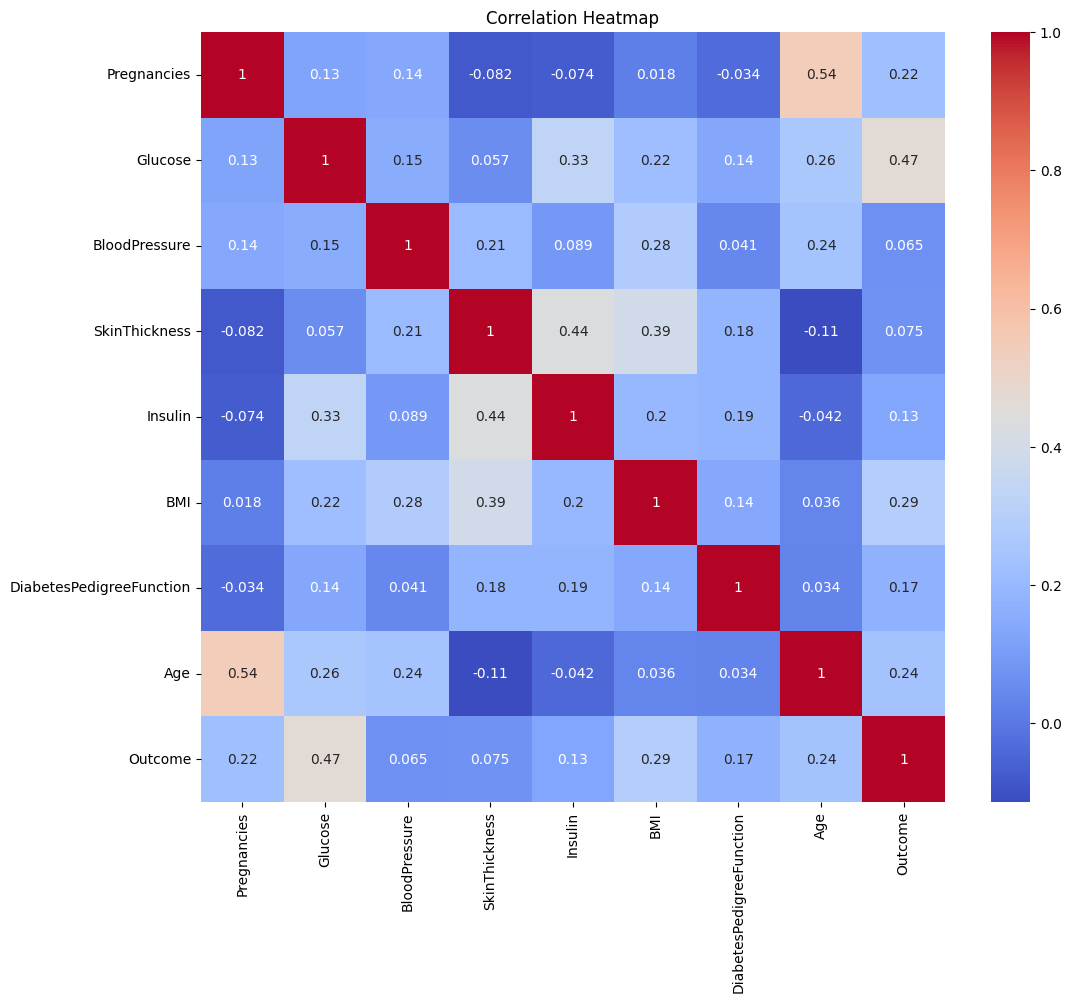

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


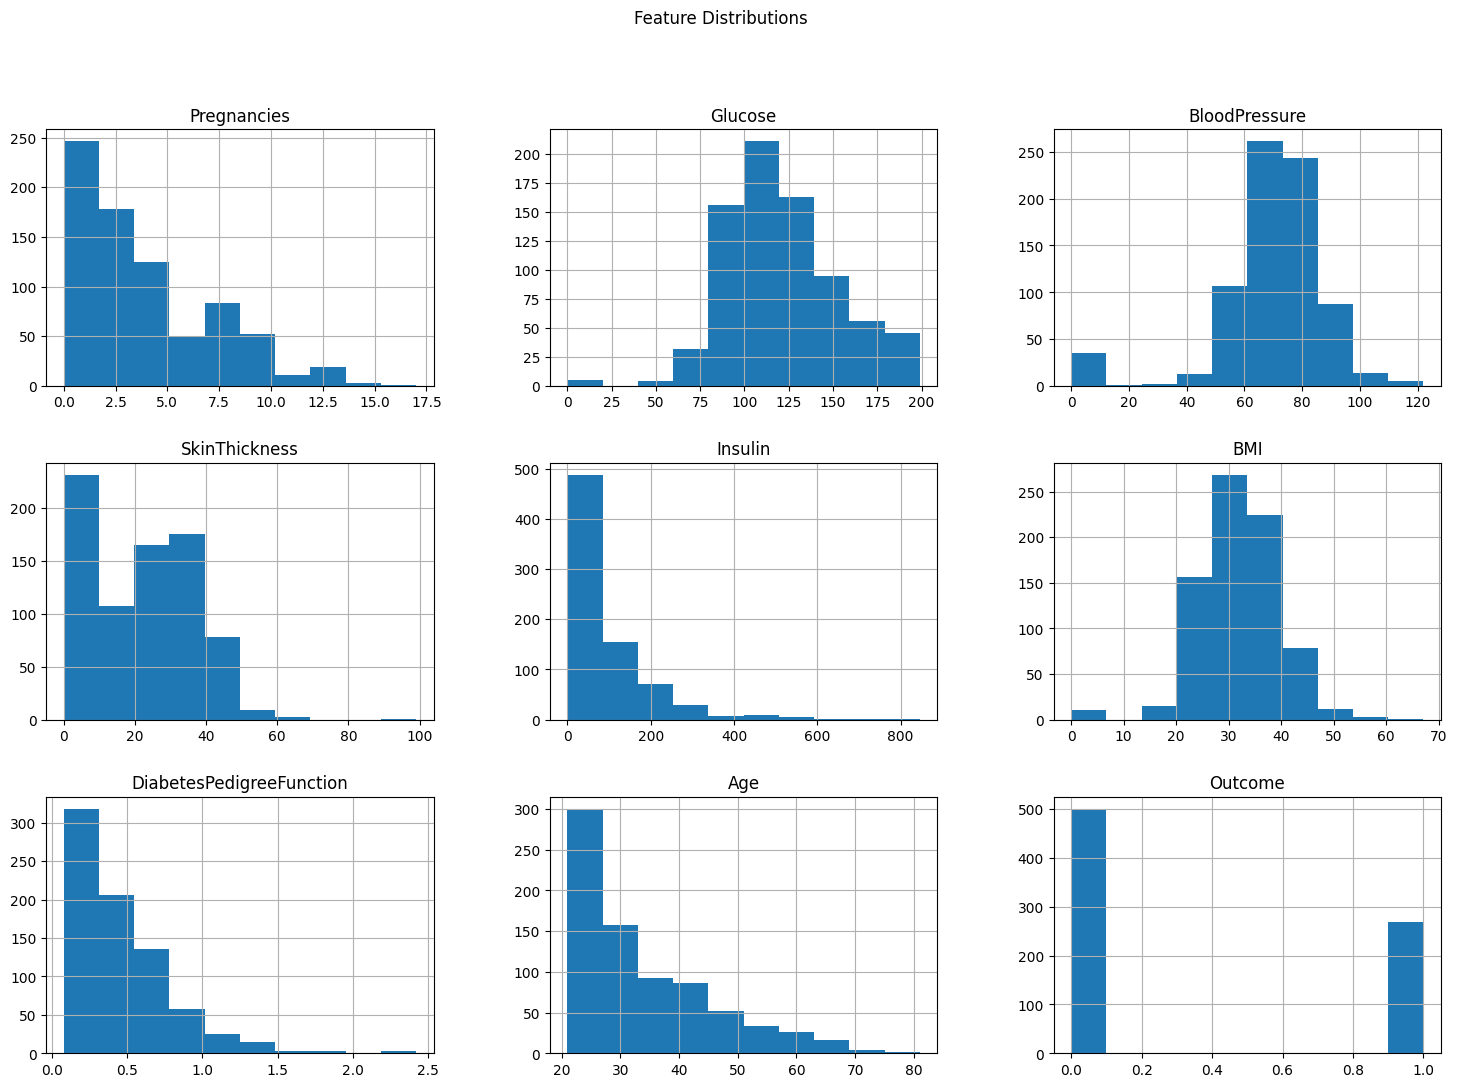

In [8]:
# Histogram of features
data.hist(figsize=(18, 12))
plt.suptitle('Feature Distributions')
plt.show()


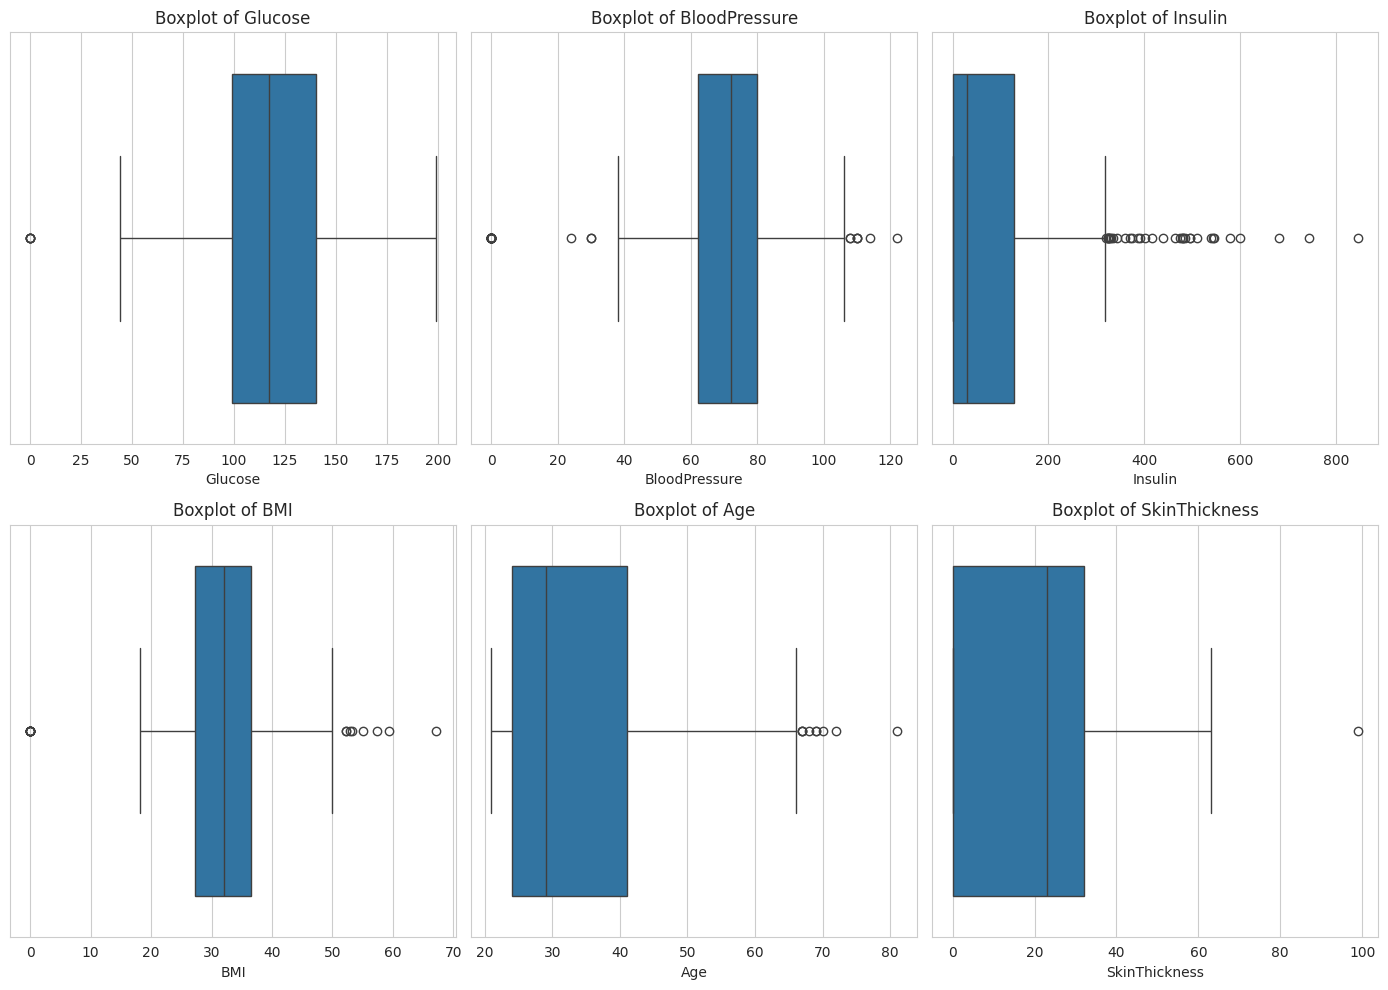

In [9]:
# Boxplots for each feature
plt.figure(figsize=(14, 10))
sns.set_style(style='whitegrid')
features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'SkinThickness']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, data=data)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


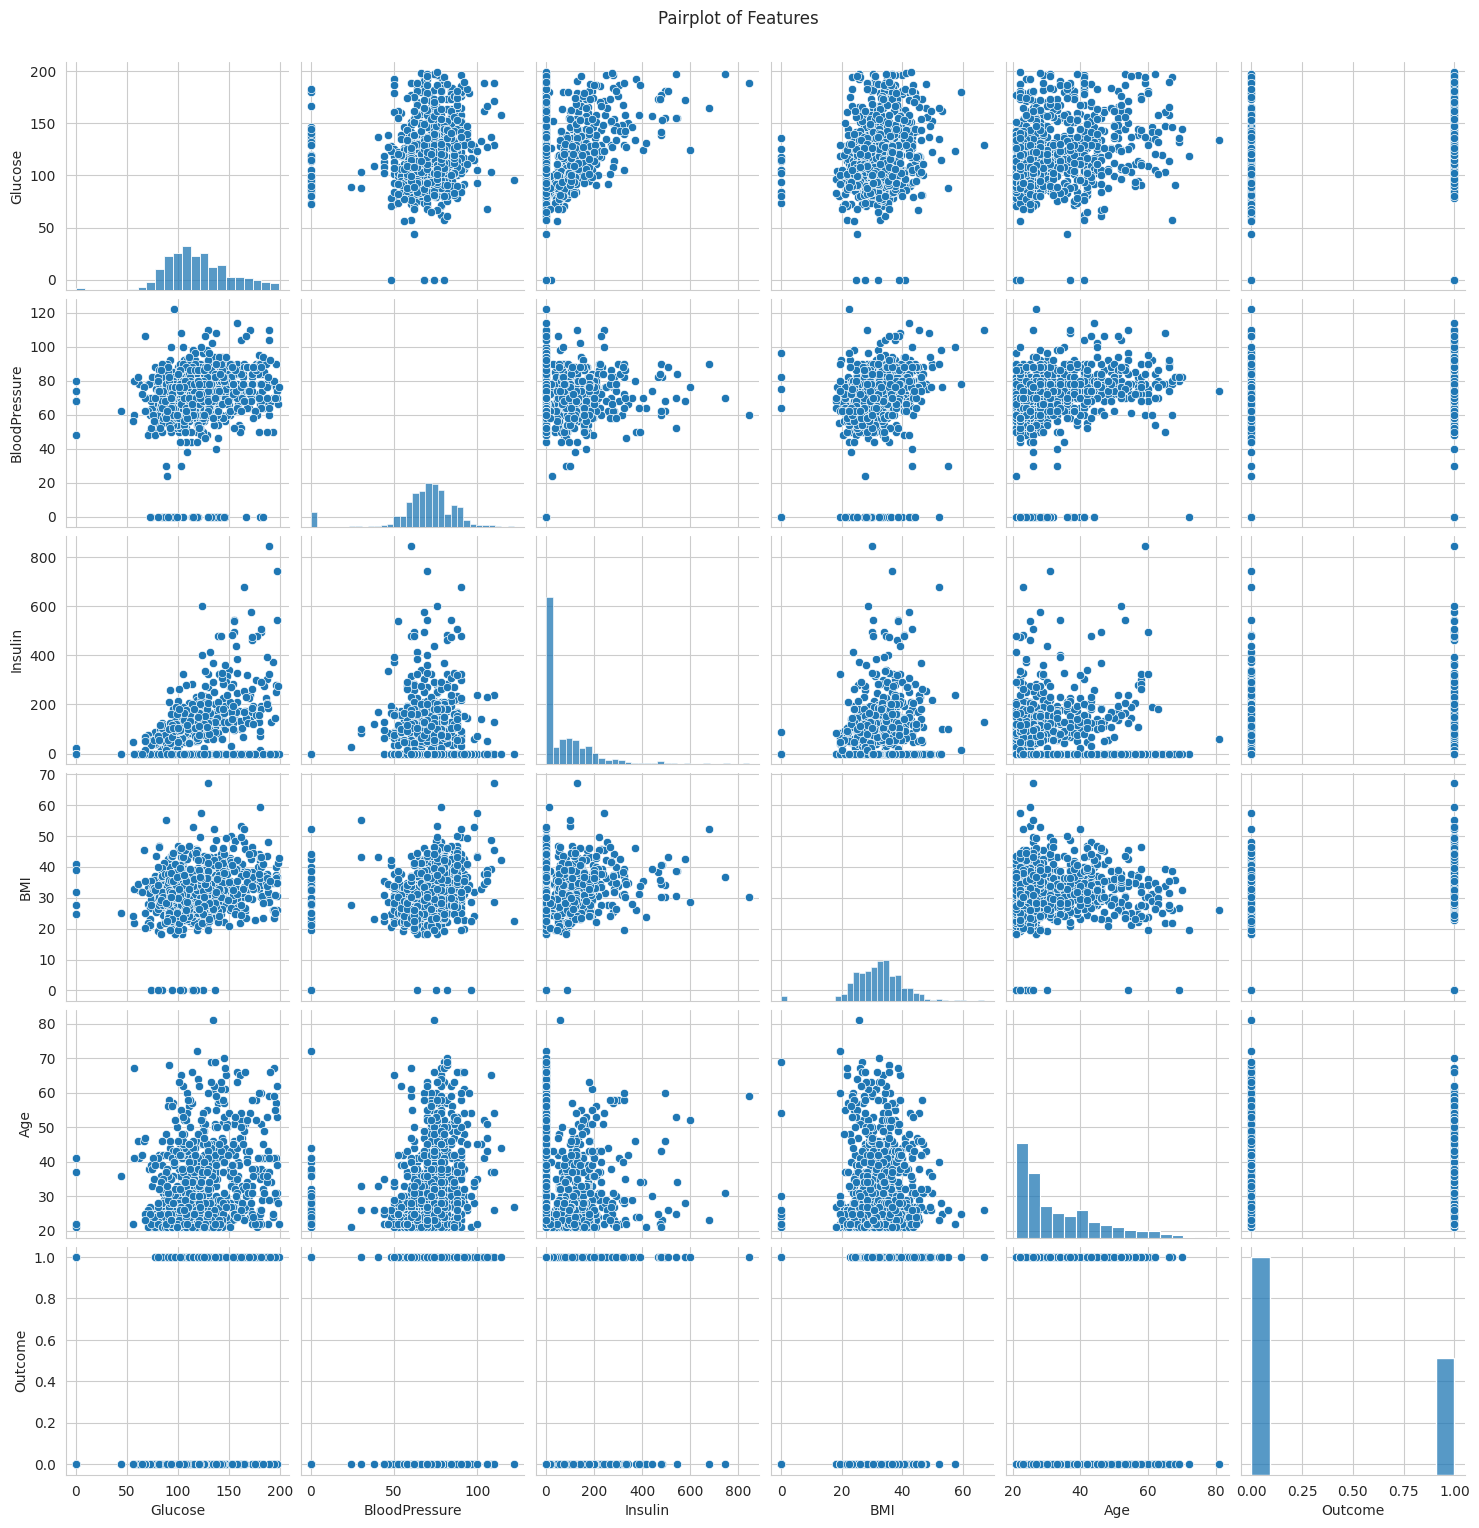

In [10]:
# Pairplot of significant features
mean_col = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'Outcome']
sns.pairplot(data[mean_col], palette='Accent')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


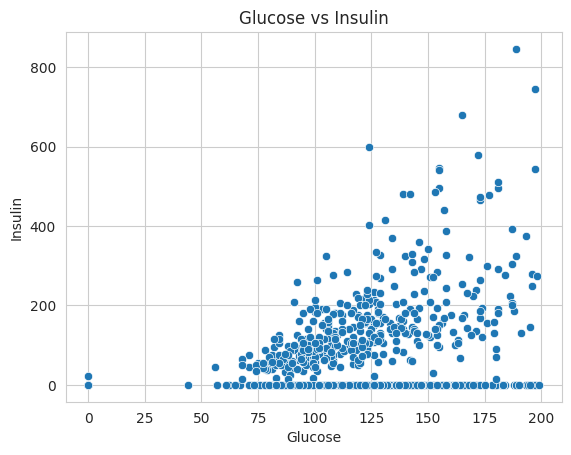

In [11]:
# Scatterplot of Glucose vs Insulin
sns.scatterplot(x='Glucose', y='Insulin', data=data)
plt.title('Glucose vs Insulin')
plt.show()

In [12]:
# Data Preprocessing
X = data.drop(columns='Outcome')
y = data['Outcome']


In [13]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [15]:
# Checking for NaN/Infinity values
print("NaN in X_train:", np.isnan(X_train).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("Infinity in X_train:", np.isinf(X_train).sum())
print("Infinity in y_train:", np.isinf(y_train).sum())

NaN in X_train: 0
NaN in y_train: 0
Infinity in X_train: 0
Infinity in y_train: 0


In [16]:
# Handling NaN/Infinity by replacing with mean (if applicable)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [17]:
# Hyperparameter tuning for Random Forest
rf = RandomForestClassifier(random_state=0)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [18]:
# Hyperparameter tuning for XGBoost

xgb = XGBClassifier(eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for hyperparameter tuning
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Best XGBoost model after tuning
best_xgb = xgb_grid.best_estimator_



In [19]:

# KNN model with hyperparameter tuning for optimal k
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': range(1, 31)
}
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Best KNN model after tuning
best_knn = knn_grid.best_estimator_


In [20]:

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('knn', best_knn)],
    voting='hard')

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=150,
                                                     random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, g...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('knn', KNeighborsClassifier(n_neighbors=15))])

In [21]:
# Predictions
y_pred = voting_clf.predict(X_test)


In [22]:
# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 84.4155844155844
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       107
           1       0.74      0.74      0.74        47

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.84      0.84      0.84       154

Confusion Matrix:
 [[95 12]
 [12 35]]


In [23]:
# Example prediction
y_predict = voting_clf.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic
